#Q.1
The mathematical expression for the projection $\operatorname{Proj}_C(z)$ onto this set would be:
$$
\operatorname{Proj}_C(z)= \begin{cases}z & \text { if }\|z\|_1 \leq 1 \\ \frac{z}{\|z\|_1} & \text { if }\|z\|_1>1\end{cases}
$$

This expression matches the logic in the provided code. If the $l_1$ norm of $z$ is less than or equal to 1, it returns $z$ unchanged. Otherwise, it scales $z$ by dividing each component by its $l_1$ norm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
iris = load_wine()

print(iris.data.shape)
A = iris.data
for i in range(A.shape[1]):
  A[:,i] = -1 + 2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))
#max = np.max(A , axis = 0)
#min = np.min(A,axis = 0)
#A = -1 + 2*(A - min)/(max - min)

print(iris.target.shape)

C = len(np.unique(iris.target))
print("Unique Classes: ", np.unique(iris.target))
print("Number of unique classes: ",C)

n = iris.data.shape[0]
d = iris.data.shape[1]

y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  if iris.target[i] != 1:
    y[i] = -1


indexarr = np.arange(n)
np.random.shuffle(indexarr)

(178, 13)
(178,)
Unique Classes:  [0 1 2]
Number of unique classes:  3


In [ ]:
train_data = []
train_label = []
test_data = []
test_label = []
counter = 1
for i in indexarr:
  if counter <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  counter = counter + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
def predict(w,x):
  a = np.matmul(w.T, x)
  if a > 0:
    return 1
  elif  a < 0:
    return -1
  else:
   return 0

In [ ]:
def compute_accuracy(data,labels,model_w):
  cnt = 0
  n = len(labels)
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      cnt = cnt + 1
  return cnt/n

#Q.2

In [ ]:
def compute_loss_h(w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(w.T, x))))

def compute_loss_l(w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(w.T, x)))))

def compute_loss_sh(w,x,y):
  return (max(0, np.subtract(1, np.dot(y, np.dot(w.T, x)))))**2

In [ ]:
def compute_objfnval_h(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_h(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

def compute_objfnval_l(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_l(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

def compute_objfnval_sh(data,labels,w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(w)**2), sum(compute_loss_sh(w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_h(x,y,w,i):
  l = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/x.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/x.shape[0]
  return l

def compute_grad_loss_l(data, label,w ,i):
  return np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(w, np.transpose(data[i]))))))/data.shape[0]


def compute_grad_loss_sh(x,y,w,i):
  l = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    l = np.multiply(lamda, w)/x.shape[0]
  else:
    l = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/x.shape[0]
  return l

#Q.3

In [ ]:
def compute_orthogonal_projection(z, lamda):
  length = len(z)
  #minimum_x = np.ones(length)
  #for i in range(length):
   # if abs(z[i]- lamda ) > 0:
    #  minimum_x[i] = np.sign(z[i])*(abs(z[i]- lamda ))
    #else:
     # minimum_x[i] = 0
  #return minimum_x
  sum = np.sum(abs(z[i]) for i in range(length))
  if sum<=1:
    z = z
  if sum>1:
    for i in range(length):
      z[i] = z[i]/sum
  return z


#Q.4

In [ ]:
def OPT1_h(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_h(x,y,w,i))), lamda)
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_h(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))


  return w, f_val_arr, test_acc_arr, train_acc_arr

# **4. a)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


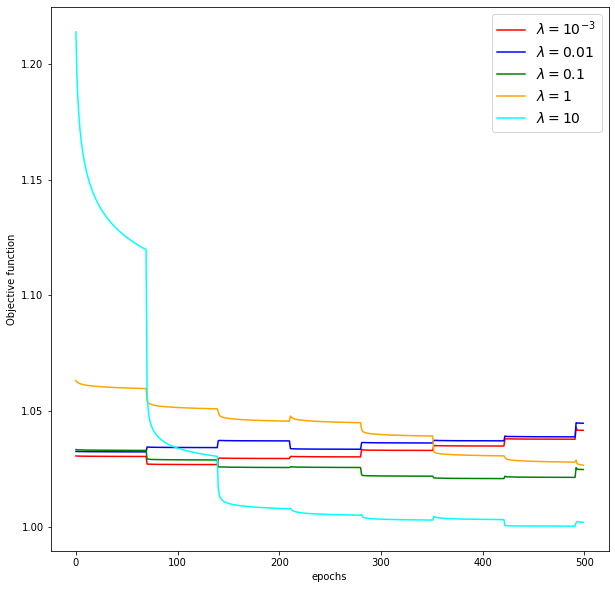

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

# **4. b)**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


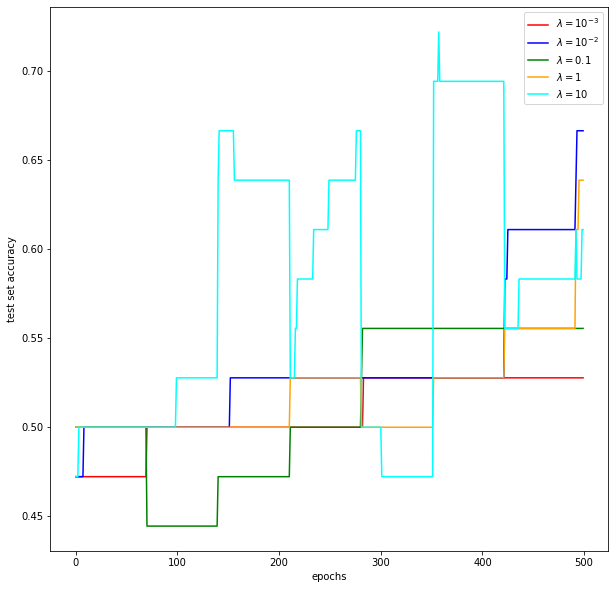

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

# **4. c)**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


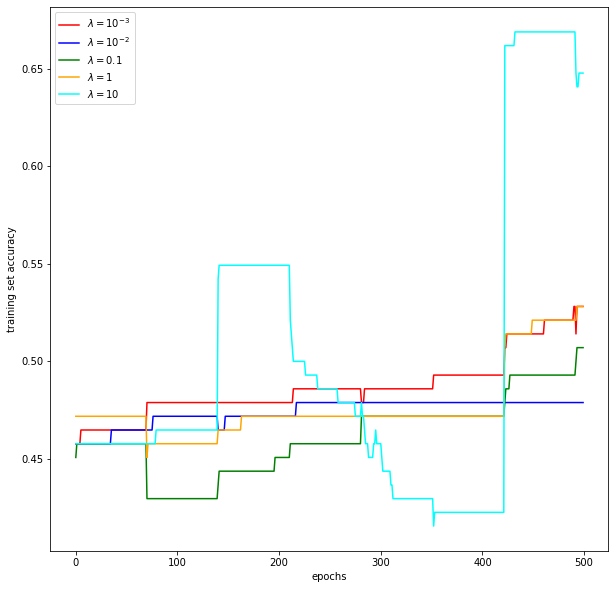

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

# **4. d)**

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_h(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │            0.555556 │             0.507042 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │            0.527778 │             0.478873 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │            0.555556 │             0.514085 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │            0.611111 │             0.535211 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │            0.527778 │             0.422535 │
╘═════════╧═════════════════════╧══════════════════════╛


# **4. e)**
**Observations:**We can see that with varying value of lambda test set accuracy also changing little bit and maximum at lamda = 1
Similarly trainig set accuracy(48.59%) is also not varying that much with lamda and maximum at lamda = 1(53.5%).

**Regularization Strength (\(\lambda\)) and Objective Function:**

- Increasing \(\lambda\) increases the objective function value, reflecting stronger regularization.
- Smaller \(\lambda\) values lead to lower objective function values, indicating overfitting.

**Test Accuracy:**

- Test accuracy improves with higher \(\lambda\), indicating better generalization.
- Lower \(\lambda\) values may result in overfitting and lower test accuracy.

**Training Accuracy:**

- Training accuracy decreases with higher \(\lambda\), showing regularization's effect.
- Lower \(\lambda\) values yield higher training accuracy but may overfit.

**Gap between Test and Training Accuracy:**

- A gap between test and training accuracy suggests overfitting, especially for low \(\lambda\).
- Increasing \(\lambda\) reduces this gap, indicating better generalization.

**Optimal \(\lambda\):**

- Optimal \(\lambda\) balances between fitting the data and generalization.
- It maximizes test accuracy while maintaining reasonable training accuracy.


# **5) For $L_l$**


In [ ]:
def OPT1_l(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_l(x,y,w,i))), lamda)
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_l(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))


  return w, f_val_arr, test_acc_arr, train_acc_arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


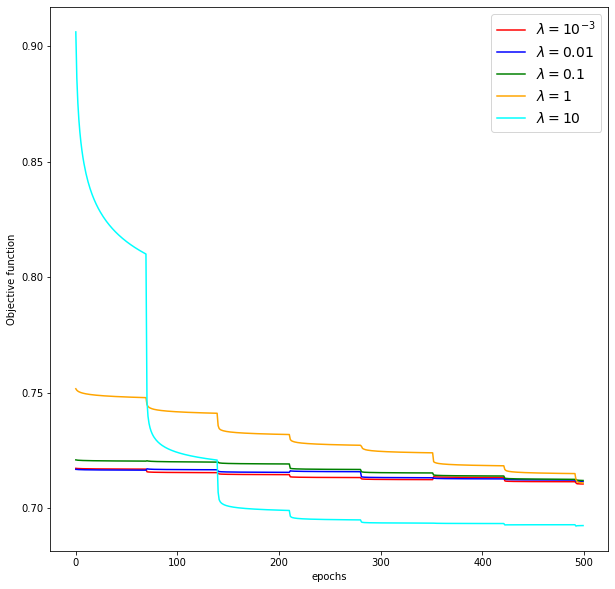

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_l(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


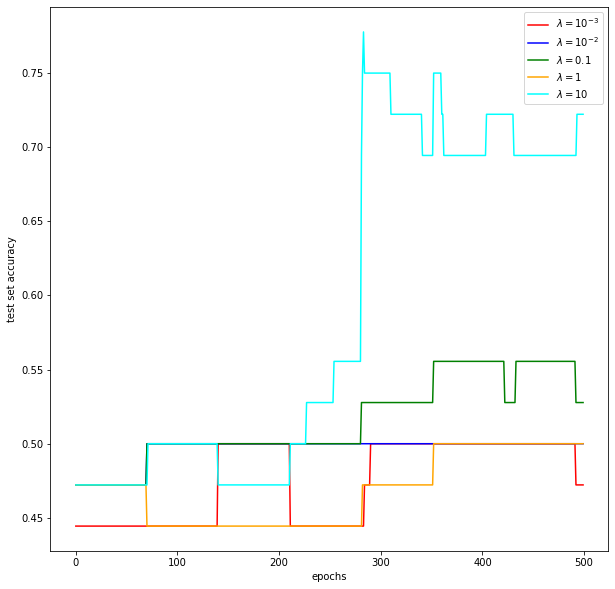

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


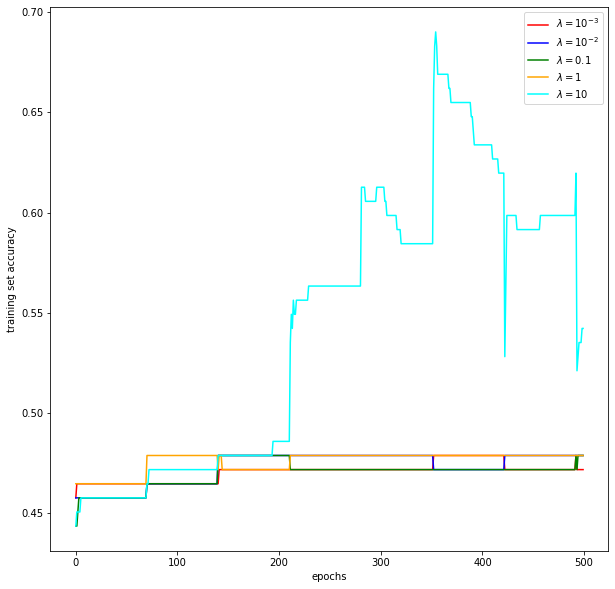

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc ,color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_l(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │            0.5      │             0.478873 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │            0.5      │             0.464789 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │            0.5      │             0.471831 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │            0.5      │             0.471831 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │            0.583333 │             0.640845 │
╘═════════╧═════════════════════╧══════════════════════╛


# **Observations:**
We can see that with varying lamda test set accuracy is almost same(50%) only it increased for lamda = 10.
Similarly training set accuracy is also almost same for each value of lamda (47%) only it increased for lamda = 10(64%).

# **5) For $L_{sh}$**

In [ ]:
def OPT1_sh(data, label, lamda, epochs):
  t = 1
  w = np.ones(data.shape[1])
  arr = np.arange(data.shape[0])
  f_val_arr = []
  test_acc_arr = []
  train_acc_arr = []
  x = data
  for epoch in range(epochs):
    np.random.shuffle(arr)
    for i in np.nditer(arr):
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_sh(x,y,w,i))), lamda)
      t = t+1
      if t>1e4:
        t = 1
    f_val_arr.append(compute_objfnval_sh(data,label,w))
    train_acc_arr.append(compute_accuracy(train_data, train_label, w))
    test_acc_arr.append(compute_accuracy(test_data, test_label, w))


  return w, f_val_arr, test_acc_arr, train_acc_arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


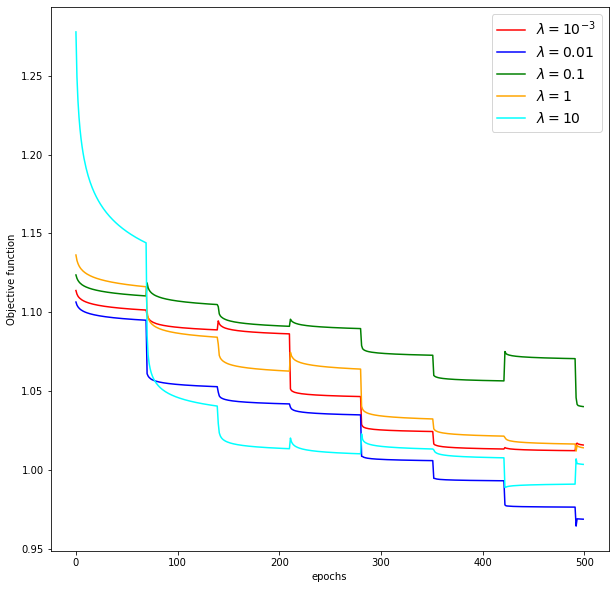

In [ ]:
num_epochs = 500
lambda_set = [10**(-3), 10**(-2),0.1, 1, 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize=(10,10))
for lamda in lambda_set:
  w, f_val, test_acc_arr, train_acc_arr = OPT1_sh(train_data,train_label,lamda, num_epochs)
  plt.plot(list(range(num_epochs)),f_val,color = clr_lst[i])
  i = i+1
plt.xlabel('epochs')
plt.ylabel('Objective function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"],fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


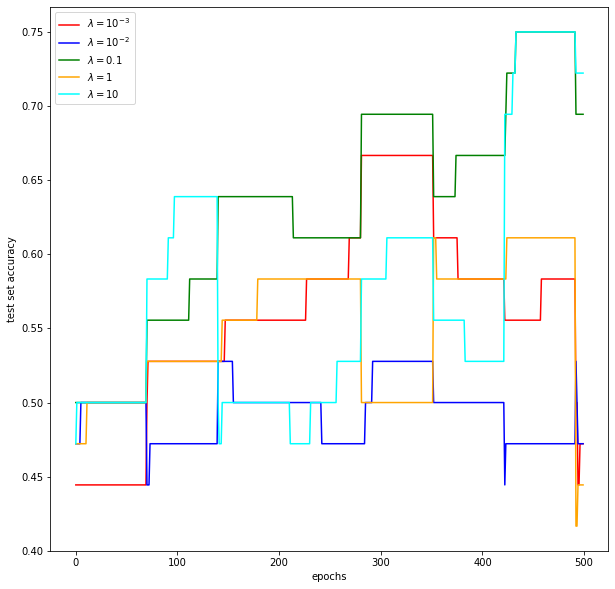

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),test_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("test set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


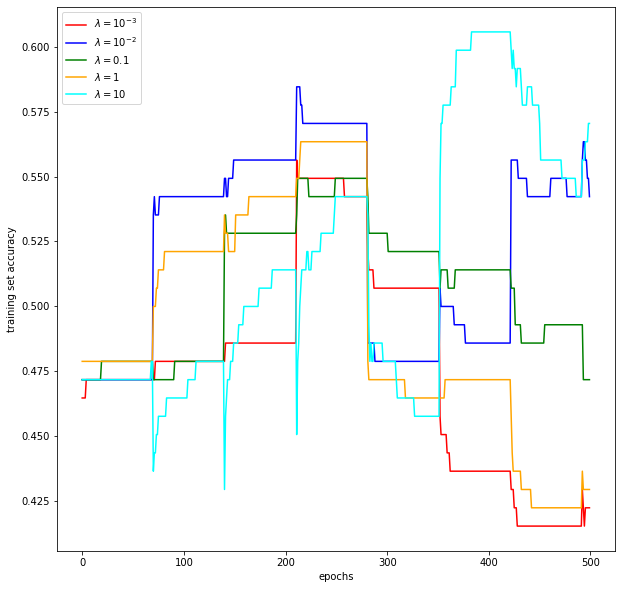

In [ ]:
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
clr_lst = ["red", "blue", "green", "orange","cyan"]
i = 0
plt.figure(figsize = (10,10))
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  plt.plot(list(range(num_epochs)),train_acc , color= clr_lst[i])
  i = i+1
plt.xlabel("epochs")
plt.ylabel("training set accuracy")
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 10^{-2}$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

In [ ]:
from tabulate import tabulate
table = [["lamda" , "test set accuracy" , "train set accuracy"]]
num_epochs = 500
lamda_lst = [10**(-3) , 10**(-2) , 0.1 , 1 , 10]
i = 0
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sh(train_data , train_label , lamda , num_epochs)
  table.append([lamda , test_acc[-1] , train_acc[-1]])
  i = i+1
print(tabulate(table , headers = 'firstrow', tablefmt = 'fancy_grid'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


╒═════════╤═════════════════════╤══════════════════════╕
│   lamda │   test set accuracy │   train set accuracy │
╞═════════╪═════════════════════╪══════════════════════╡
│   0.001 │            0.611111 │             0.528169 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.01  │            0.527778 │             0.450704 │
├─────────┼─────────────────────┼──────────────────────┤
│   0.1   │            0.5      │             0.471831 │
├─────────┼─────────────────────┼──────────────────────┤
│   1     │            0.5      │             0.359155 │
├─────────┼─────────────────────┼──────────────────────┤
│  10     │            0.694444 │             0.535211 │
╘═════════╧═════════════════════╧══════════════════════╛


# **Observations:**
We can see that test set accuracy is not varying that much with lamda and maximum at lamda = 10 (69%).
Training set accuracy is varying with lamda and maximum at lamda = 10(53%).

We can conclude that we got highest trainig set accuracy by logistic function and we got highest test set accuracy by squared hinge loss function.